<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        ©️ <b><i>Copyright 2023 @ Authors</i></b><br/>
        作者：<a style="font-weight:bold" href="mailto:bshan@mail.hust.edu.cn">斯坦福大厨 📨 </a><br>
        日期：2023-11-28<br/>
        <img src="https://github.com/stanfordbshan/CompMatBook/blob/main/author.png?raw=true" width="100"/>
        共享协议：本作品采用<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">知识共享署名-非商业性使用-相同方式共享 4.0 国际许可协议</a>进行许可。</i><br/>
    </p>
</div>

恭喜您已经发现了这份神奇的计算材料学课件！这份课件是我在熬夜吃掉不计其数的披萨和咖啡后创作出来的，配套的教材是由单斌、陈征征、陈蓉合著的《计算材料学--从算法原理到代码实现》。学习资料合集您可以在这个网址找到：[www.materialssimulation.com/book](http://www.materialssimulation.com/book)，您也可以跟着up主[无人问津晦涩难懂的B站视频](https://space.bilibili.com/1111135013/channel/collectiondetail?sid=1458375)一起进行学习。希望它能帮您在计算材料学的道路上摔得不那么痛。

就像您尊重那些一边烘焙披萨一边写代码的大厨一样，当您使用这份课件时，请：

- 记得告诉大家这份课件是斯坦福大厨写的，并且他在华中科技大学微纳中心工作
- 别用它去赚大钱，这个课件是用来学习的，不是用来买披萨的
- 保持开放共享的精神




如果你有关于计算材料学的想法，或者你只是想和我讨论最好吃的披萨口味，欢迎通过邮件 bshan@mail.hust.edu.cn 联系我。

# 目录（对应《计算材料学》章节8.2.2）

<a href="https://item.jd.com/14285722.html"><img src="https://github.com/stanfordbshan/CompMatBook/blob/main/cover.png?raw=true"  width="200"/></a>
<a href="https://item.jd.com/14285722.html">点击购书</a>

* [GTO](#GTObasics)
    * [1. 拒绝采样法简介](#rejection)
    * [2. 拒绝采样法基本思想](#principle)
    * [3. 复杂PDF的拒绝采样实例](#ex01)
    * [4. 无法归一的拒绝采样实例](#ex02)
* [参考](#references)

<a name="rejection"></a>
# 拒绝采样法简介

蒙特卡洛方法是一种基于随机抽样的计算方法，广泛应用于各种领域，如数值积分、概率分布的模拟等。在蒙特卡洛方法中，拒绝采样（Rejection Sampling）是一种特别重要的技术。

拒绝采样法（Rejection Sampling）在某些情况下是非常有用的，尤其是当直接从目标分布 $p(x)$ 采样比较困难时。这种方法的优点在于它允许我们从一个相对简单的分布 $q(x)$ 采样，然后通过一定的准则来决定是否接受这个样本，从而最终获得符合复杂目标分布 $p(x)$ 的样本集。下面是拒绝采样法的一些主要优点：

1. **处理复杂分布**：有些概率分布的形式非常复杂，例如多峰分布或者包含不规则形状的分布。在这些情况下，直接从 $p(x)$ 采样可能非常困难或者计算成本很高。拒绝采样通过使用一个简单的分布 $q(x)$ 作为替代，简化了采样过程。

2. **计算简化**：在某些情况下，目标分布 $p(x)$ 的形式可能已知，但其归一化常数（比如概率密度函数的积分）难以计算。因为拒绝采样只需要目标分布和提议分布的相对大小，所以它可以绕过对归一化常数的需求。

3. **灵活性**：拒绝采样允许使用多种不同的提议分布 $q(x)$，只要能满足 $cq(x) \geq p(x)$ 的条件。这种灵活性使得拒绝采样在不同的应用场景下都能找到合适的提议分布。

然而，拒绝采样法也有其局限性。如果提议分布 $q(x)$ 选择不当，可能会导致大量的样本被拒绝，从而降低采样效率。因此，在实际应用中，选择一个与目标分布 $p(x)$ 尽可能相似的提议分布 $q(x)$ 是很重要的。此外，确定合适的常数 $c$ 也是一个关键问题，因为它直接影响采样效率。

<a name="principle"></a>
# 拒绝采样法基本思想


拒绝采样的基本思想是：当我们需要从一个复杂的概率分布（目标分布）中生成随机样本时，可以选择一个简单的分布（提议分布），只要这个简单分布能够覆盖目标分布的整个支撑集（support）。然后，我们从这个简单分布中生成样本，并以一定的概率接受或拒绝这些样本。这个接受或拒绝的概率基于目标分布和提议分布的相对大小。

具体步骤如下：

1. 选择一个易于抽样的提议分布 $q(x)$ 和一个常数 $c$，使得对于所有的 $x$，都有 $cq(x) \geq p(x)$，其中 $p(x)$ 是目标分布。

2. 从提议分布 $q(x)$ 中抽取一个样本 $x$。

3. 生成一个 $[0, 1]$ 区间上均匀分布的随机数 $u$。

4. 如果 $u \leq \frac{p(x)}{cq(x)}$，则接受样本 $x$；否则拒绝样本 $x$。

5. 重复步骤2至4，直到得到足够数量的接受样本。

拒绝采样的关键在于选择合适的提议分布和常数 $c$，以保证采样效率。如果 $c$ 太大，会导致许多样本被拒绝，降低效率；如果选择的提议分布 $q(x)$ 与目标分布 $p(x)$ 相差很大，同样会影响采样效率。因此，理想的情况是 $q(x)$ 能够尽可能地接近 $p(x)$，同时 $c$ 尽可能地小。

假设我们想从一个定义在区间 $[0,1]$ 上的非标准化的三角形分布中采样，这个分布的概率密度函数（PDF）是一个线性函数，但我们并不知道其精确的数学形式。我们可以选择均匀分布作为提议分布 $q(x)$，因为它易于采样且覆盖了三角形分布的全部区域。

在这种情况下，如果我们直接使用均匀分布来近似这个三角形分布，会产生较大的偏差，因为均匀分布并不能很好地捕捉到三角形分布在不同区域的概率密度变化。特别是在三角形分布的峰值附近，均匀分布将严重低估样本的概率。

相反，如果我们使用拒绝采样，我们可以生成均匀分布的样本，然后根据三角形分布的形状来决定是否接受这些样本。这样，我们可以保证接受的样本更加符合三角形分布的实际形态，尤其是在分布的峰值附近。通过这种方式，即使我们不知道三角形分布的精确形式，拒绝采样也能够产生更接近目标分布的样本。

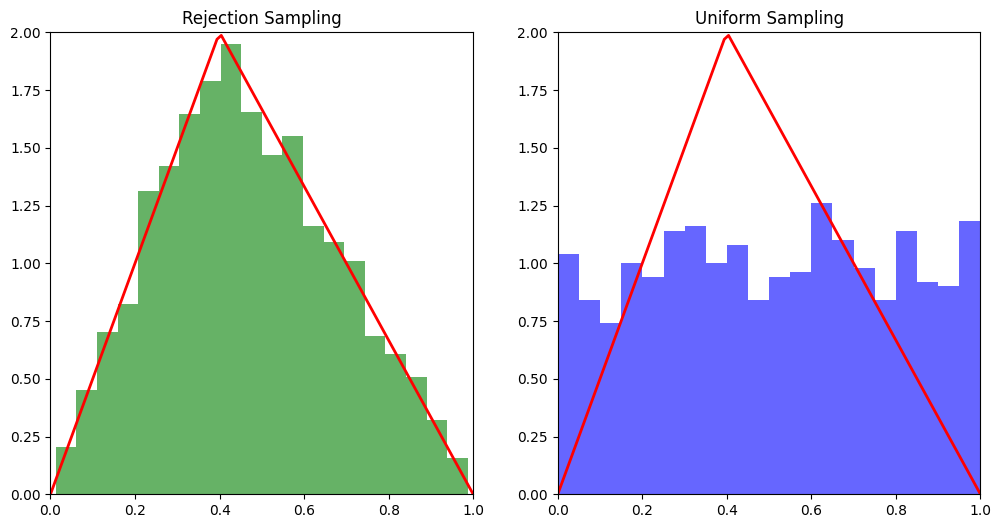

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 三角形分布的概率密度函数
def triangular_pdf(x, c=0.4):
    return  2 * x / c if x < c else 2 * (1 - x) / (1 - c)

# 拒绝采样
def rejection_sampling(tri_pdf, N=1000):
    samples = []
    for _ in range(N):
        x = np.random.uniform(0, 1)
        qx = 2
        u = np.random.uniform(0, 1)
        if u < tri_pdf(x)/qx:
            samples.append(x)
    return np.array(samples)

# 从三角形分布中采样
samples_tri = rejection_sampling(triangular_pdf, 10000)

# 直接从均匀分布中采样
samples_uni = np.random.uniform(0, 1, 1000)

# 绘制结果
plt.figure(figsize=(12, 6))

# 拒绝采样的结果
plt.subplot(1, 2, 1)
plt.hist(samples_tri, bins=20, density=True, alpha=0.6, color='g')
x = np.linspace(0, 1, 100)
plt.plot(x, [triangular_pdf(xi) for xi in x], 'r-', lw=2)
plt.title('Rejection Sampling')
plt.ylim(0, 2)
plt.xlim(0, 1)

# 直接使用均匀分布采样的结果
plt.subplot(1, 2, 2)
plt.hist(samples_uni, bins=20, density=True, alpha=0.6, color='b')
plt.plot(x, [triangular_pdf(xi) for xi in x], 'r-', lw=2)
plt.title('Uniform Sampling')
plt.ylim(0, 2)
plt.xlim(0, 1)

plt.show()



<a name="ex01"></a>
# 复杂PDF的拒绝采样实例

下面是一个很难取样的函数的例子。

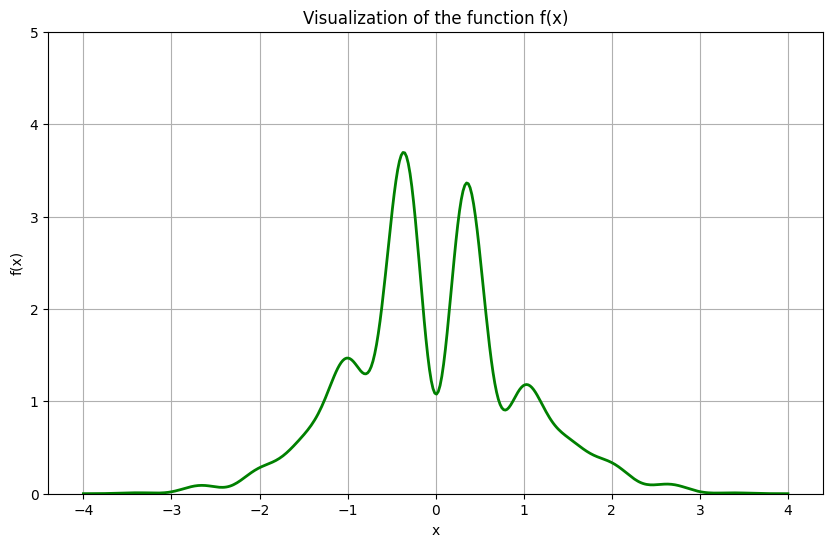

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.exp(-x**2 / 2) * (np.sin(6 + x)**2 + 3 * np.cos(x)**2 * np.sin(4 * x)**2 + 1)

# Create an array of x values from -10 to 10
x = np.linspace(-4, 4, 400)

# Calculate the y values
y = f(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='green', linewidth=2)
plt.title('Visualization of the function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(0,5)
plt.grid(True)
plt.show()


### 1. 用均匀分布的提议函数q(x)

24*Uniform

In [ ]:
def rejection_sampling(target_func, interval, num_samples, proposal_dist='uniform', scale=None, proposal_params=None):
    a, b = interval
    samples = []
    count = 0

    # Set default values for the scaling constant and proposal parameters if not provided
    if scale is None:
        scale = 25 if proposal_dist == 'uniform' else 11
    if proposal_params is None:
        proposal_params = {'mean': 0, 'std': 1} if proposal_dist == 'gaussian' else {}

    while len(samples) < num_samples:
        # Generate a sample from the specified proposal distribution
        if proposal_dist == 'uniform':
            x = np.random.uniform(a, b)
            q_x = 1 / (b - a)  # Proposal density for uniform distribution
        elif proposal_dist == 'gaussian':
            mean = proposal_params.get('mean', 0)
            std = proposal_params.get('std', 1)
            x = np.random.normal(mean, std)
            q_x = 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / std) ** 2)  # Proposal density for Gaussian distribution
        else:
            raise ValueError("Unsupported proposal distribution")

        # Generate a uniform random number for acceptance criterion
        u = np.random.uniform(0, 1)

        # Acceptance criterion
        if u <= target_func(x) / (scale * q_x):
            samples.append(x)

        count += 1

    return samples, count



In [ ]:
# Number of samples to be generated
num_samples = 1000

uniform_samples, uniform_total_trials = rejection_sampling(
    f,
    (-3, 3),
    num_samples,
    proposal_dist='uniform',scale=24
)
# Display the results
uniform_samples[:10], uniform_total_trials  # Display first 10 samples and total number of trials

([-0.4687778127357425,
  1.531785098194792,
  -0.30258136592846085,
  -0.4111764468267811,
  -2.387065186391574,
  -0.30672174861945845,
  0.5678834647435416,
  1.6650500324486455,
  -0.34896341154976884,
  -0.3678566034275752],
 4043)

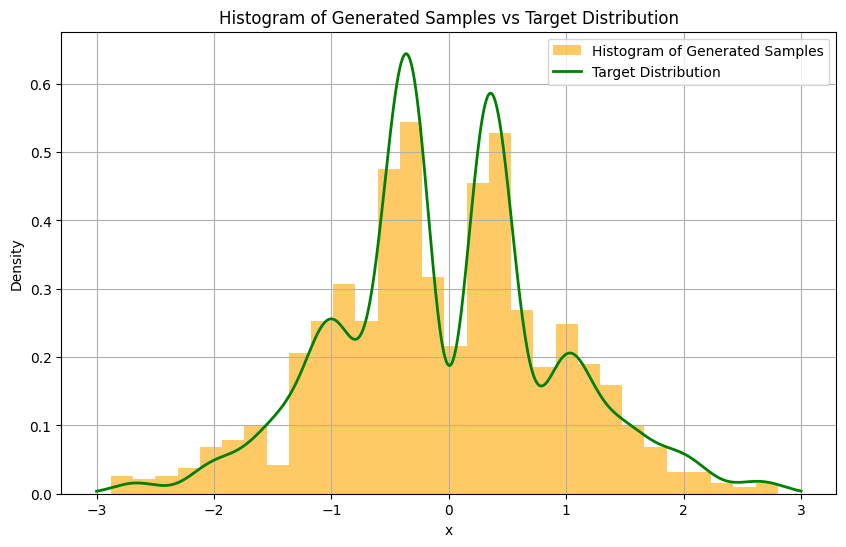

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of the generated samples
plt.figure(figsize=(10, 6))
plt.hist(uniform_samples, bins=30, color='orange',density=True, alpha=0.6, label='Histogram of Generated Samples')

# Plot the target distribution for comparison
x = np.linspace(-3, 3, 1000)
y = f(x)
plt.plot(x, y / sum(y * (x[1] - x[0])), label='Target Distribution', color='green',linewidth=2)

plt.title('Histogram of Generated Samples vs Target Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


用高斯分布作为提议分布q(x)

In [ ]:
# Example usage for Gaussian proposal distribution
num_samples = 1000
gaussian_samples, gaussian_total_trials = rejection_sampling(f, (-3, 3), num_samples, proposal_dist='gaussian', scale=11)

gaussian_samples[:10], gaussian_total_trials  # Display first 10 samples and total number of trials for Gaussian distribution

([0.2943260194286003,
  1.4754812885969038,
  0.08032543874542196,
  -0.7961323810814329,
  0.42924056761674645,
  -0.934045710273074,
  1.1403403553434064,
  -0.59974515823972,
  -1.1815489358500468,
  0.23316176302023253],
 1953)

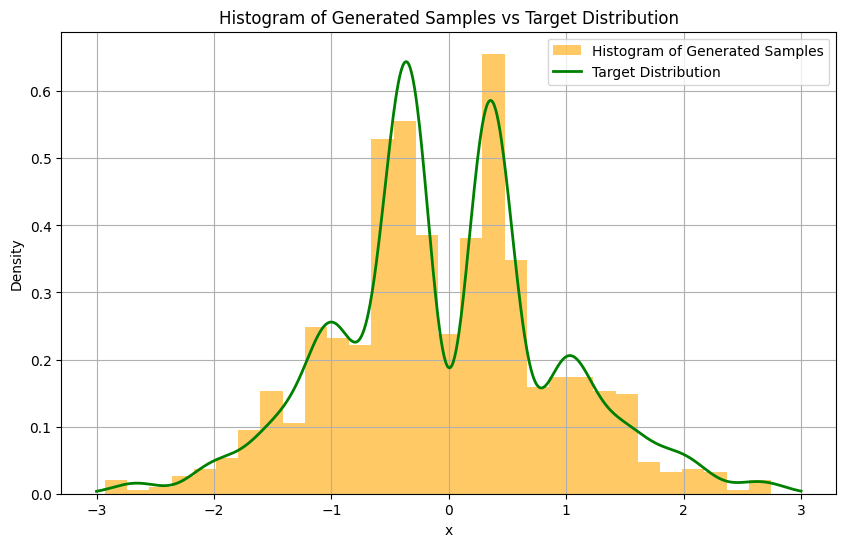

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of the generated samples
plt.figure(figsize=(10, 6))
plt.hist(gaussian_samples, bins=30, color='orange',density=True, alpha=0.6, label='Histogram of Generated Samples')

# Plot the target distribution for comparison
x = np.linspace(-3, 3, 1000)
y = f(x)
plt.plot(x, y / sum(y * (x[1] - x[0])), label='Target Distribution', color='green',linewidth=2)

plt.title('Histogram of Generated Samples vs Target Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

<a name="ex02"></a>
# 无法归一的拒绝采样实例

### 硬币翻转问题介绍：
硬币翻转问题是贝叶斯统计中的一个经典案例。在这个问题中，我们通过观察硬币正面出现的次数来估计硬币正面朝上的概率（记为 $ \theta $）。在贝叶斯框架下，我们通常计算后验概率，这是通过结合我们的先验信念和观察到的数据来获得的。然而，后验概率的准确计算往往受阻于分母（证据或边缘似然）的计算，特别是在先验分布和似然函数复杂的情况下。

### 拒绝采样方法的作用：
拒绝采样方法在这里的作用是允许我们从后验分布中采样，而无需直接计算这个分布的分母。这是通过以下步骤实现的：

1. **选择一个提议分布**，通常比目标分布简单，且容易从中采样。
2. **生成随机样本**，并使用一个接受或拒绝的标准来决定是否保留这些样本。
3. **接受的样本**将构成目标分布的一个代表性样本集。

### 代码解释：
1. **非归一化的后验分布**：我们定义了一个函数 `unnormalized_posterior` 来计算后验概率的非归一化值，此处无需计算分母。
2. **参数设置**：设定实验的总次数 `n` 和观察到的正面次数 `y`。
3. **拒绝采样过程**：通过重复采样和应用拒绝采样的规则来获得样本。每个样本基于是否满足特定条件（与常数 `c` 的比较）被接受或拒绝。
4. **结果的可视化**：绘制样本的直方图并与理论上的Beta分布进行比较，直观展示采样结果与理论预期的一致性。

通过这种方式，拒绝采样帮助我们绕过了后验概率中分母的直接计算，使得我们能够有效地估计硬币正面朝上的概率 $ \theta $。

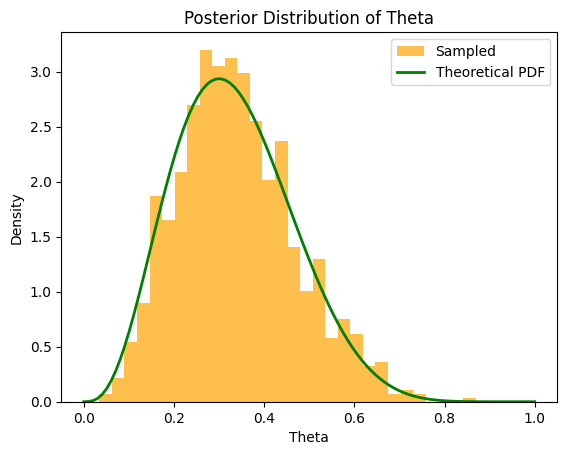

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior and likelihood
def unnormalized_posterior(theta, y, n):
    return theta**y * (1 - theta)**(n - y)

# Parameters
n = 10  # Total number of flips
y = 3   # Number of heads observed
c = 1   # Constant for the acceptance criterion

# Rejection sampling
samples = []
while len(samples) < 1000:  # Number of desired samples
    theta_proposal = np.random.uniform(0, 1)  # Sample from the proposal distribution
    if np.random.uniform(0, 1) < unnormalized_posterior(theta_proposal, y, n) / c:
        samples.append(theta_proposal)

# Plotting the histogram of samples
plt.hist(samples, bins=30, density=True, alpha=0.7, color='orange', label='Sampled')

# Plotting the theoretical curve
theta_values = np.linspace(0, 1, 100)
plt.plot(theta_values, beta.pdf(theta_values, y+1, n-y+1), 'g-', lw=2, label='Theoretical PDF')

plt.xlabel('Theta')
plt.ylabel('Density')
plt.title('Posterior Distribution of Theta')
plt.legend()
plt.show()


## 参考资料

- [单斌、陈征征、陈蓉(2023). 《计算材料学：从算法原理到代码实现》. 华中科技大学出版社（作为配套教材强烈建议购买！）](https://item.jd.com/14285722.html)
- [本节B站教学视频](https://www.bilibili.com/video/BV1yK411b7cf/)
- [Rejection Sampling - VISUALLY EXPLAINED with EXAMPLES!](https://www.youtube.com/watch?v=si76S7QqxTU)
- [Accept-Reject Sampling : Data Science Concepts](https://www.youtube.com/watch?v=OXDqjdVVePY&list=RDCMUCUcpVoi5KkJmnE3bvEhHR0Q&index=4)